<img height="20%" src="http://www.exalumnos.usm.cl/wp-content/uploads/2015/06/Isotipo-Negro.gif" width="20%">


<hr style="height: 2px; border: none;">
<h1> INF-393 Máquinas de Aprendizaje II-2019 </h1>

<h3> Tarea 0 - Introducción a Máquinas de Aprendizaje </h3>
<hr style="height: 2px; border: none;">

**Temas**  
* Introducción a librerías comunes de *Machine Learning*:
    * Pandas
    * Numpy
    * Sklearn
    * Matplotlib
    * Otro..
* Implementación de Perceptrón y variantes.
* Implementación de método aprendizaje online (Gradiente descendente).
 

** Formalidades **  
* Equipos de trabajo de: 2 personas
* Se debe preparar un (breve) Jupyter/IPython notebook que explique la actividad realizada y las conclusiones del trabajo
* Fecha de entrega: 6 de Septiembre.
* Formato de entrega: envı́o de link Github al correo electrónico del ayudante (*&lt;francisco.mena.13@sansano.usm.cl&gt;*) , incluyendo al profesor en copia (*&lt;jnancu@inf.utfsm.cl&gt;*). Por favor especificar el siguiente asunto: [Tarea0-INF393-II-2019]

<hr style="height: 2px; border: none;">

La tarea se divide en secciones:

[1.](#primero) Perceptrón a mano

<hr style="height: 2px; border: none;">&lt;/jnancu@inf.utfsm.cl&gt;&lt;/francisco.mena.13@sansano.usm.cl&gt;

<a></a>
## 1. Perceptrón a mano

<img src="https://miro.medium.com/max/1838/1*n6sJ4yZQzwKL9wnF5wnVNg.png" width="40%">

En esta sección se le pedirá que implemente el algoritmo online del *perceptrón* [[2]](#refs) para aprender una función de separación lineal en un problema de clasificación binaria (0 o 1) a través de la función de *treshold*. Un algoritmo online, como el caso del *perceptrón*, aprende de una instancia de dato a la vez $(x^{(i)},y^{(i)})$, dentro de un conjunto de datos $\{(x^{(1)},y^{(1)}), (x^{(2)},y^{(2)}), \ldots, (x^{(N)},y^{(N)})  \}$, donde la predicción de la clase para cada instancia es través de la función de *treshold*:

$$
\hat{y_i} = f(x^{(i)};w,b) = \left\{ \begin{array}{lc}
       1 &  si \sum_j w_j \cdot x^{(i)}_j +b > \theta \\
       0 &  si  \sum_j w_j \cdot x^{(i)}_j +b < \theta
     \end{array} \right.
$$


Donde $\theta = 0$. Recordar que el *bias* $b$ se puede incluir dentro de los pesos/parámetros $w$ si se agrega una columna extra de 1's a los datos de entrada $x$ (*como se ve en la imagen anterior*). 

Para lo que sigue de la actividad sólo podrá utilizar *numpy* (para operaciones de algebra lineal).

> a) Escriba una función que calcule el valor de salida (*output*) del modelo $f(x)$ para un patrón de entrada $x$ a través de los pesos $w$ del modelo. *Decida si incluir los bias dentro de $w$ o manejarlos de manera separada*.

> b) Escriba una función que implemente el clásico algoritmo del **Perceptrón** para un problema binario que permita entrenarlo en un conjunto de datos de tamaño $N$, leídos de manera *online* (uno a uno). *Recordar la decisión anterior sobre los bias*.

> c) Demuestre que lo implementado funciona en un problema real de clasificación. Para esto utilice el dataset **Breast cancer wisconsin**, disponible a través de la librería __[*sklearn*](http://scikit-learn.org)__, el cual corresponde a la detección de cancer mamario a través de características relevantes (numéricas continuas) de un examen realizado, como por ejemplo la textura, simetría y tamaño de una masa mamaria. Estas características deben combinarse linealmente para la detección del cancer.
> <div class="alert alert-block alert-info">Es una buena práctica el normalizar los datos antes de trabajar con el modelo</div>

```python
from sklearn.datasets import load_breast_cancer
X_train,y_train = load_breast_cancer(return_X_y=True)
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_train = np.c_[X_train, np.ones(N) ] #add columns of 1's if you want
```

> Para evaluar los resultados mida la exactitud (*accuracy*) de la clasificación durante el entrenamiento (por cada iteración/instancia/dato) y grafique, utilice el conjunto de entrenamiento realizando una sola pasada (el objetivo de esta sección es familiarizarse con el algoritmo). Además reporte el tiempo de entrenamiento mediante el algoritmo implementado.

> d) Escriba una función que implemente el **Forgetrón** [[3]](#refs) con una memoria de tamaño $K$ y la función de kernel como el producto interno (*inner-product*), esto es $\langle {a,b} \rangle = \sum_i a_i \cdot b_i$.

> e) Vuelva a realizar el item c) para el **Forgetrón** con un $K=10$ y compare los resultados.


### ¿Qué sucede al variar la función objetivo del problema? 
Si utilizáramos la función de pérdida *binary cross entropy*, que castiga de manera suave los valores en que se equivoca el modelo a través de que el valor de salida sea una confiabilidad $g(x; w,b) \in [0,1]$.

$$ \ell (y, \ g(x;w,b)) = - y \cdot \log{(g(x;w,b))} - (1-y) \cdot \log{(1-g(x;w,b))} $$

Realice una modificación al perceptrón para que entregue como salida una confiabilidad continua entre 0 y 1. Una buena aproximación de la función *treshold* (con $\theta=0$) del perceptrón es la función sigmoidal.

<img src="https://i.imgur.com/lr6F3Ur.png" width="60%">

Ésto sería modelar el perceptrón como:

$$ g(x^{(i)};w,b) = p(y=1|x^{(i)}) = \sigma \left( \sum_j w_j \cdot x^{(i)}_j +b \right) $$

Con $\sigma$ la función sigmoidal de la forma $\sigma(\xi) = 1/(1+e^{-\xi})$, la cual tiene una derivada cíclica que hace más fácil el cálculo: $\sigma'(\xi) = \sigma(\xi) (1-\sigma(\xi))$

> f) Escriba una función que compute la función sigmoidal para una entrada $\xi$ cualquiera. *Tenga cuidado con los límites de números que puede trabajar python (por ejemplo $\exp{800}\rightarrow +\infty$)*. *Se aconseja acotar/truncar los valores que entran a la función para que la operación se pueda realizar*. Además escriba una función que calcule la salida del nuevo modelo $g(x; w,b)$ con esta función sigmoidal.

> g) Escriba una función que calcule la función de pérdida descrita anteriormente para un dato $x^{(i)}$, utilizando $g(x^{(i)};w,b)$. *Tenga cuidado con los límites del logaritmo (recordad que $\log{0}\rightarrow +\infty$)*.

> h) Escriba una función que calcule el gradiente (derivada) de la función de pérdida anterior con respecto a los pesos del modelo $w$. *Se recomienda derivarla analíticamente y luego escribirla*. *Recuerde el uso de la regla de la cadena*.

> i) Realice una modificación al algoritmo implementado en b) (**Perceptrón**) para que se adapte a la función objetivo *binary cross entropy* implementada, para ésto haga uso del algoritmo de optimización SGD [[4]](#refs) (*Stochastic Gradient Descend*) con tasa de aprendizaje $\eta \in [0,1]$.

$$ \vec{w}^{(t+1)} \leftarrow \vec{w}^{(t)} - \eta \cdot \nabla_{\vec{w}^{(t)}} \ell $$

> j) Vuelva a realizar el item c) con esta modificación, además grafique la función de pérdida en el transcurso del entrenamiento. Compare los resultados.<a,b>

In [1]:
# Librerias a utilizar correr para asegurar uso
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import time
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_breast_cancer

In [2]:
# Funcion para calcular unit step
# Bias dentro de pesos con indice n + 1 en pesos[-1]
def Funcion(pesos, entrada):
    suma = np.dot(entrada,pesos)
    if suma >= 0:
        return 1
    else:
        return 0

In [253]:
# Definicion del algoritmo Perceptron
# Flag indica si solo usamos una iteracion al set completo
def Perceptron(entradas,esperados, T=1):
    inicio = time.time()
    ratio_entrenamiento = 0.05
    pesos = np.zeros(len(entradas[0]))
    errores = True
    iteracion = 0
    i = 0
    historico = [[],[]]
    while(T > 0):
        correctas = 0
        for entrada,esperado in zip(entradas,esperados):
            i += 1
            prediccion = Funcion(entrada,pesos)
            if esperado != prediccion:
                pesos += (esperado - prediccion) * entrada
            else:
                correctas += 1
        historico[1].append(list(pesos))
        historico[0].append(float(correctas)/len(X_train))
        T -= 1
    print("Tiempo usado por perceptron: %f [s]" % round(time.time()-inicio,3))
    return pesos,historico

In [333]:
# Funcion para graficar accuracy y pesos finales
def graficar(historico,pesos):
    plt.plot(range(len(historico))[::10],historico[::10],color="red")
    plt.scatter(range(len(historico)),historico,alpha="0.2")
    plt.xlabel("Época")
    plt.ylabel("Precisión")
    plt.title("Perceptron\nPrecisión entre épocas")
    plt.show()
    plt.barh(range(len(pesos)),pesos)
    plt.ylabel("Peso")
    plt.xlabel("Valor")
    plt.title("Perceptron\nValores finales de los pesos (incluye bias)")
    plt.show()

# Funcion para graficar el movimiento de los pesos en las epocas
def variacion_perceptron(graf):
    fig, axs = plt.subplots(7, 5, sharex=True)
    fig.set_figheight(15)
    fig.set_figwidth(25)
    fig.suptitle('Perceptron\nCambio de pesos entre épocas')
    num = 0
    i = 0
    col = 0
    fila = 0
    for column in range(len(graf[1][0])):
        datos = []
        for a in graf[1]:
            datos.append(a[i])
        axs[fila][col].plot(range(len(graf[1])), datos)
        axs[fila][col].title.set_text("Peso {}".format(i+1))
        col += 1
        col = col % 5
        if col == 0:
            fila += 1
        i += 1

In [329]:
# Obtenemos el dataset de entrenamiento y seteamos nuestros pesos en 0
X_train,y_train = load_breast_cancer(return_X_y=True)
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_train = np.c_[X_train,np.ones(len(X_train))] # Añadimos unos para el bias en el calculo

In [326]:
# Utilizamos nuestro Perceptron y obtenemos el tiempo de ejecucion
pesos,historico = Perceptron(X_train,y_train,1000)

Tiempo usado por perceptron: 1.008000 [s]


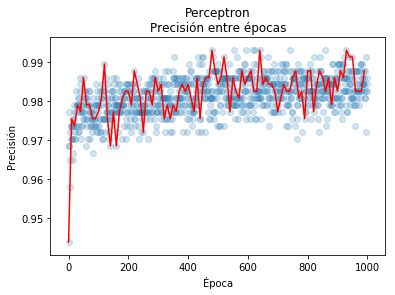

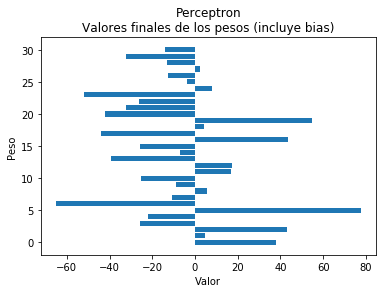

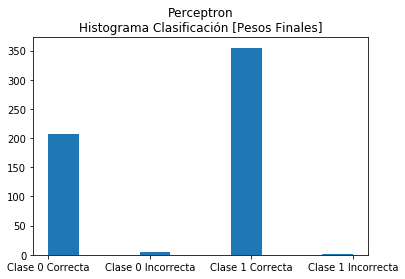

In [334]:
# Graficamos Precision y pesos
graficar(historico[0],pesos)
graf = [[[],[]],[[],[]],[[],[]],[[],[]]]
colors = list()
histo = []
labels = ["Clase 1 Correcta","Clase 0 Correcta","Clase 1 Incorrecta","Clase 0 Incorrecta"]
for a,b in zip(X_train,y_train):
    prob = Funcion(pesos,a)
    if prob == 1 and b == 1:
        histo.append(labels[0])
    elif prob == 0 and b == 0:
        histo.append(labels[1])
    elif b == 1:
        histo.append(labels[2])
    else:
        histo.append(labels[3])
plt.title("Perceptron\nHistograma Clasificación [Pesos Finales]")
plt.hist(histo,label=labels)
plt.show()

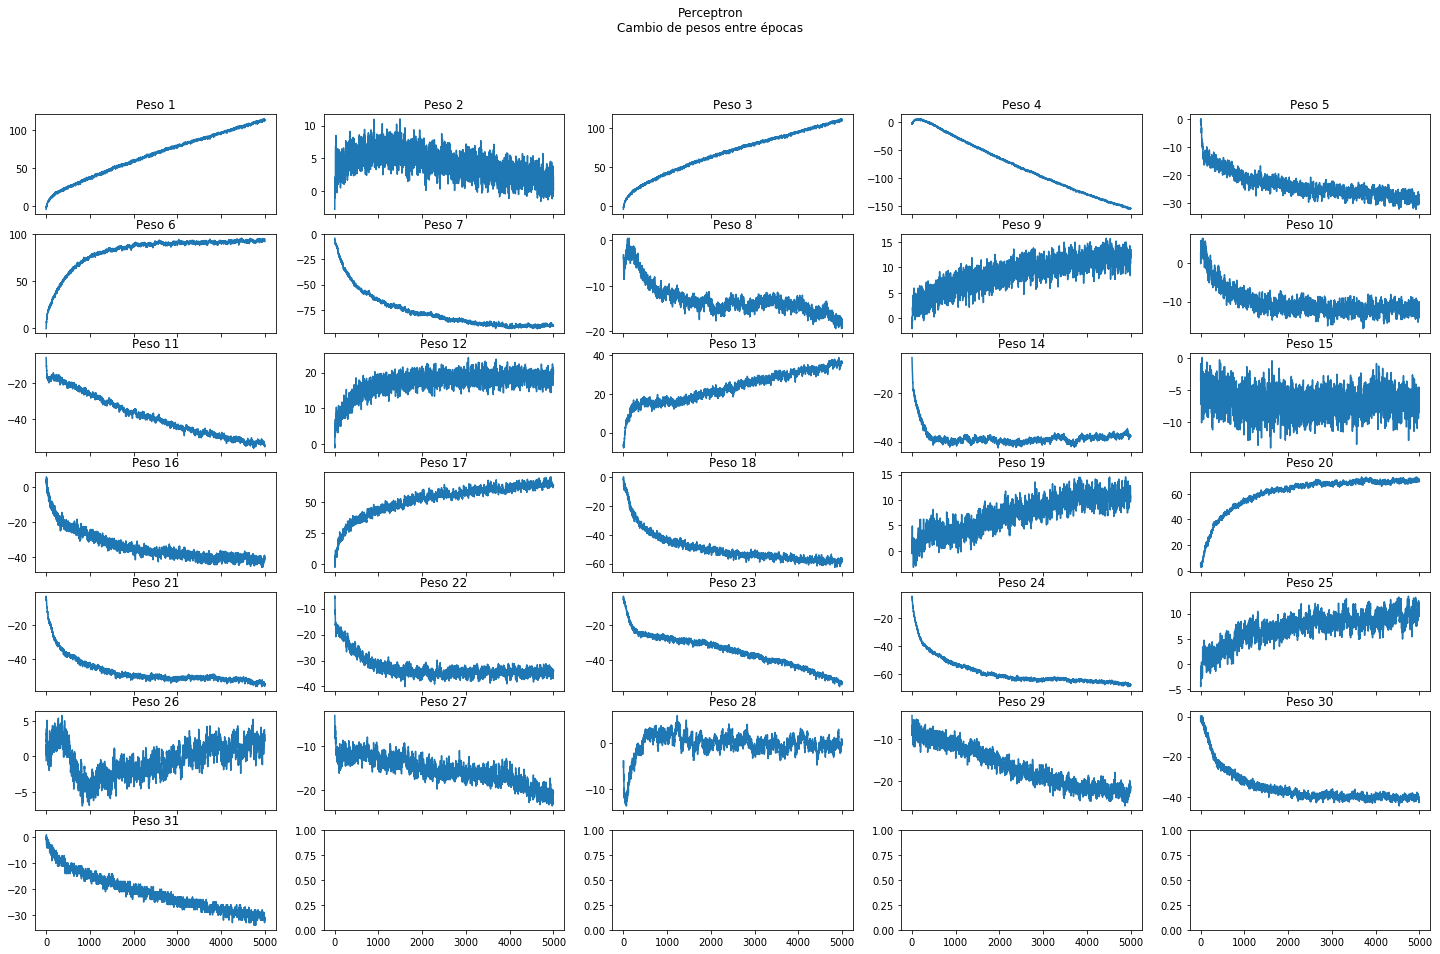

In [266]:
variacion_perceptron(historico)

In [196]:
def var_alfas(ratio,pos):
    return ratio**pos

def modificar_mem(memoria_y):
    mem = []
    for y in memoria_y:
        if y == 0:
            mem.append(-1)
        else:
            mem.append(y)
    return mem

def y_sombrero(memoria_x,alfas,entrada,memoria_y):
    sum = 0
    for mem_x,mem_y,alfa in zip(memoria_x,memoria_y,alfas):
        sum += alfa * mem_y * np.dot(mem_x,entrada)
    if sum >= 0:
        return 1
    else:
        return 0

def Forgetron(X_train,y_train,K=10,T=1):
    pesos = [0] * len(X_train[0])
    ratio = 0.7
    alfas = [0] * K
    for a in range(len(alfas)):
        alfas[a] = var_alfas(ratio, a+1)
    memoria_x = [[0] * len(X_train[0])] * K
    memoria_y = [0] * K
    graf = []
    for a in range(T):
        aux = 0.0
        for x,y in zip(X_train,y_train):
            if y == y_sombrero(memoria_x,alfas,x,memoria_y):
                aux += 1
            else:
                memoria_x[:-1] = memoria_x[1:]
                memoria_x[-1] = list(x)
                memoria_y[:-1] = memoria_y[1:]
                memoria_y[-1] = y
                memoria_y = modificar_mem(memoria_y)
        graf.append(aux/len(X_train))
    return alfas,memoria_x,memoria_y,graf

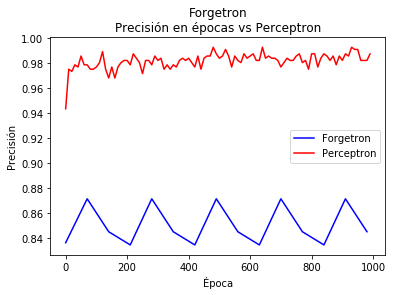

In [336]:
# Obtenemos el dataset de entrenamiento y seteamos nuestros pesos en 0
X_train,y_train = load_breast_cancer(return_X_y=True)
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_train = np.c_[X_train,np.ones(len(X_train))] # Añadimos unos para el bias en el calculo

alfas,memoria_x,memoria_y,graf_forg = Forgetron(X_train,y_train,10,1000)

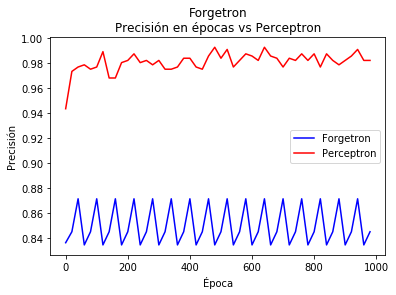

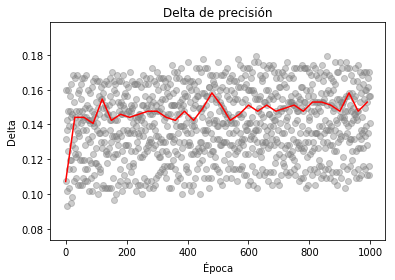

In [360]:
plt.plot(range(len(graf_forg))[::20],graf_forg[::20],label="Forgetron",color="Blue")
plt.plot(range(len(historico[0]))[::20],historico[0][::20],color="red",label="Perceptron")
plt.title("Forgetron\nPrecisión en épocas vs Perceptron")
plt.xlabel("Época")
plt.ylabel("Precisión")
plt.legend()
plt.show()
delta = [x1 - x2 for (x1, x2) in zip(historico[0], graf_forg)]
plt.scatter(range(len(delta)),delta,alpha="0.4",color="gray")
plt.plot(range(len(delta))[::30],delta[::30],color="red")
plt.title("Delta de precisión")
plt.xlabel("Época")
plt.ylabel("Delta")
plt.show()

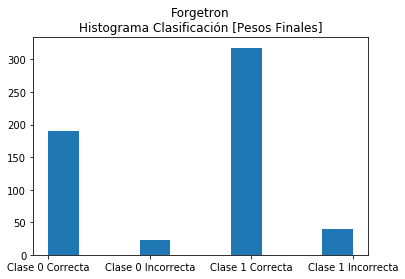

In [268]:
graf = [[[],[]],[[],[]],[[],[]],[[],[]]]
colors = list()
histo = []
labels = ["Clase 1 Correcta","Clase 0 Correcta","Clase 1 Incorrecta","Clase 0 Incorrecta"]
for a,b in zip(X_train,y_train):
    prob = y_sombrero(memoria_x,alfas,a,memoria_y)
    if prob == 1 and b == 1:
        histo.append(labels[0])
    elif prob == 0 and b == 0:
        histo.append(labels[1])
    elif b == 1:
        histo.append(labels[2])
    else:
        histo.append(labels[3])
plt.title("Forgetron\nHistograma Clasificación [Pesos Finales]")
plt.hist(histo,label=labels)
plt.show()

In [368]:
# Revisar Overflow con los exp
def logloss(labels, entradas, pesos):
  suma = 0
  eps = 1e-15
  for label,entry in zip(labels,entradas):
        predicted = sigmoidal(sumatoria(entry,pesos))
        p = np.clip(predicted, eps, 1 - eps)
        suma -= label * np.log(p) + (1-label) * np.log(1-p)
  return suma

def sumatoria(entrada,pesos):
    return np.dot(entrada,pesos)

def sigmoidal(x, derivada=False):
    x = np.clip(x,-10,10)
    sigm = 1. / (1. + np.exp(-x))
    if derivada:
        return sigm * (1. - sigm)
    return sigm

def gradiente(entrada,pesos,esperado):
    suma = sumatoria(pesos,entrada)
    sigma = sigmoidal(suma)
    return entrada * (-esperado * (1 - sigma) + (1-esperado) * sigma)

def nuevo_modelo(entrada,pesos):
    return sigmoidal(np.dot(entrada,pesos))

def perdida(entrada,pesos,esperado):
    modelo = nuevo_modelo(entrada,pesos)
    return ((-1) * esperado * np.log(modelo) - (1 - esperado) * np.log(1 - modelo))

def PerceptronSigmoidal(X_train,y_train,T=1):
    ratio = 0.03
    pesos = np.zeros(len(X_train[0]), dtype=np.float64)
    graf = [[],[],[],[]]
    PESOS = list()
    for a in X_train[0]:
        PESOS.append(list())
    while T > 0:
        correctas = 0.0
        for entrada,esperado in zip(X_train,y_train):
            predicho = nuevo_modelo(entrada,pesos)
            if predicho >= 0.5:
                adivinar = 1
            else:
                adivinar = 0
            if esperado == adivinar:
                correctas += 1
            pesos -= ratio * gradiente(entrada,pesos,esperado)
        aux = 0
        for peso in pesos:
            PESOS[aux].append(peso)
            aux += 1
        error = logloss(y_train,X_train,pesos)
        graf[0].append(error)
        graf[1].append(pesos)
        graf[2].append(pesos[0])
        graf[3].append(correctas/float(len(X_train)))
        T -= 1
    return graf,PESOS,pesos

In [389]:
X_train,y_train = load_breast_cancer(return_X_y=True)
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_train = np.c_[X_train,np.ones(len(X_train))] # Añadimos unos para el bias en el calculo

graf_sig,PESOS,pesos = PerceptronSigmoidal(X_train,y_train,1000)

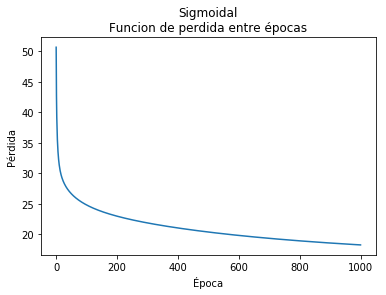

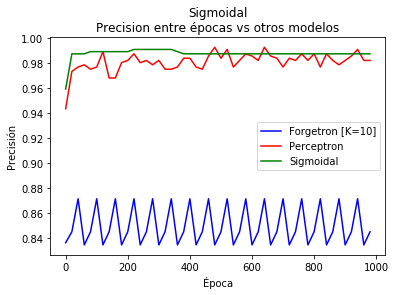

In [390]:
plt.plot(range(len(graf_sig[0])),graf_sig[0])
plt.xlabel("Época")
plt.ylabel("Pérdida")
plt.title("Sigmoidal\nFuncion de perdida entre épocas")
plt.show()
plt.plot(range(len(graf_forg))[::20],graf_forg[::20],label="Forgetron [K=10]",color="Blue")
plt.plot(range(len(historico[0]))[::20],historico[0][::20],color="red",label="Perceptron")
plt.plot(range(len(graf_sig[3]))[::20],graf_sig[3][::20],color="green",label="Sigmoidal")
plt.xlabel("Época")
plt.ylabel("Precisión")
plt.title("Sigmoidal\nPrecision entre épocas vs otros modelos")
plt.legend()
plt.show()

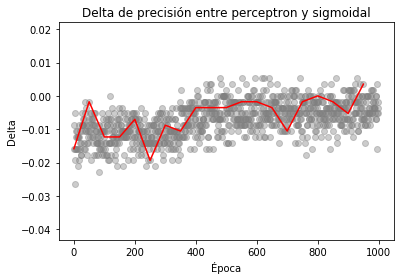

In [391]:
delta = [x1 - x2 for (x1, x2) in zip(historico[0], graf_sig[3])]
plt.scatter(range(len(delta)),delta,alpha="0.4",color="gray")
plt.plot(range(len(delta))[::50],delta[::50],color="red")
plt.title("Delta de precisión entre perceptron y sigmoidal")
plt.xlabel("Época")
plt.ylabel("Delta")
plt.show()

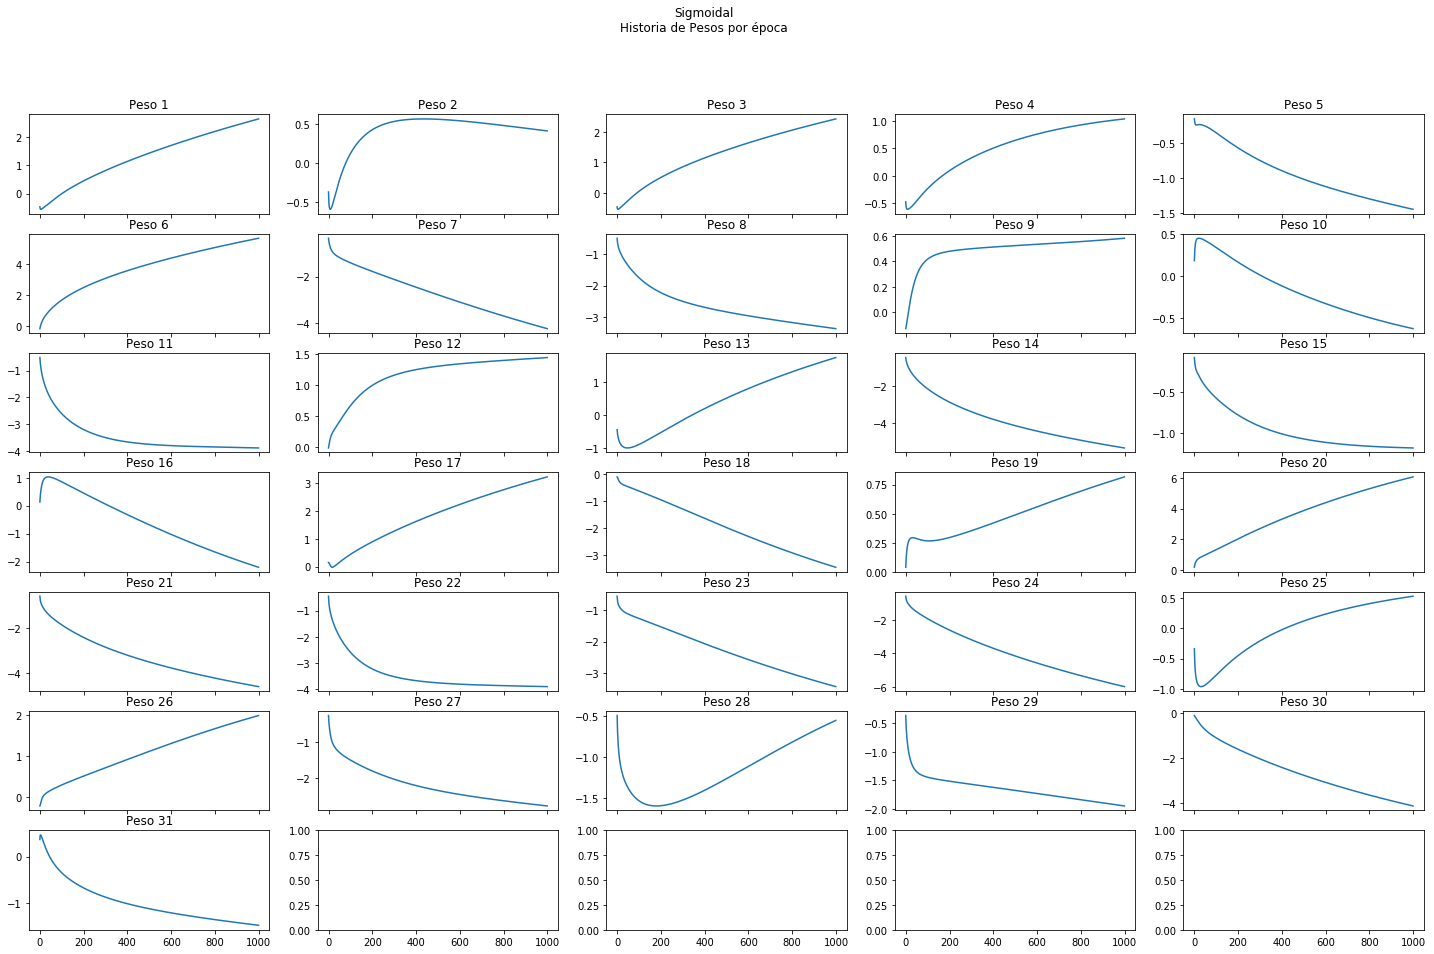

In [392]:
def variacion(datos):
    fig, axs = plt.subplots(7, 5, sharex=True)
    fig.set_figheight(15)
    fig.set_figwidth(25)
    fig.suptitle('Sigmoidal\nHistoria de Pesos por época')
    num = 0
    i = 0
    col = 0
    fila = 0
    for dato in datos:
        axs[fila][col].plot(range(len(dato)), dato)
        axs[fila][col].title.set_text("Peso {}".format(i+1))
        col += 1
        col = col % 5
        if col == 0:
            fila += 1
        i += 1
variacion(PESOS)

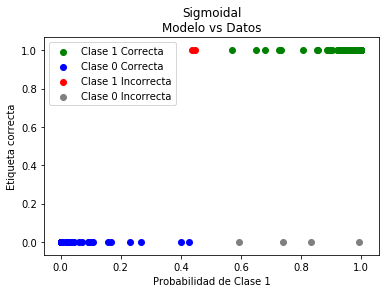

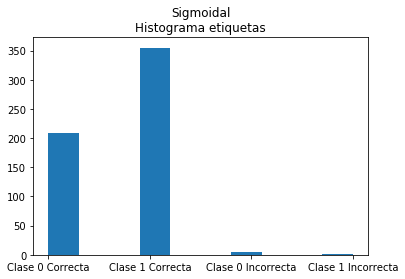

In [393]:
graf = [[[],[]],[[],[]],[[],[]],[[],[]]]
colors = list()
histo = []
labels = ["Clase 1 Correcta","Clase 0 Correcta","Clase 1 Incorrecta","Clase 0 Incorrecta"]
for a,b in zip(X_train,y_train):
    prob = sigmoidal(sumatoria(a,pesos))
    if prob >= 0.5 and b == 1:
        graf[0][0].append(prob)
        graf[0][1].append(b)
        histo.append(labels[0])
    elif prob < 0.5 and b == 0:
        graf[1][0].append(prob)
        graf[1][1].append(b)
        histo.append(labels[1])
    elif b == 1:
        graf[2][0].append(prob)
        graf[2][1].append(b)
        histo.append(labels[2])
    else:
        graf[3][0].append(prob)
        graf[3][1].append(b)
        histo.append(labels[3])
plt.scatter(graf[0][0],graf[0][1],color="green",label=labels[0])
plt.scatter(graf[1][0],graf[1][1],color="blue",label=labels[1])
plt.scatter(graf[2][0],graf[2][1],color="red",label=labels[2])
plt.scatter(graf[3][0],graf[3][1],color="gray",label=labels[3])
plt.title("Sigmoidal\nModelo vs Datos")
plt.xlabel("Probabilidad de Clase 1")
plt.ylabel("Etiqueta correcta")
plt.legend()
plt.show()
plt.title("Sigmoidal\nHistograma etiquetas")
plt.hist(histo,label=labels)
plt.show()

<a></a>
### Referencias
[1] Hastie, T.; Tibshirani, R., Friedman, J. (2009), *The Elements of Statistical Learning*, Second Edition.
Springer New York Inc.  
[2] STEPHEN, I. (1990). *Perceptron-based learning algorithms*. IEEE Transactions on neural networks, 50(2), 179.  
[3] Dekel, O., Shalev-Shwartz, S., &amp; Singer, Y. (2006). *The Forgetron: A kernel-based perceptron on a fixed budget*. In Advances in neural information processing systems (pp. 259-266).  
[4] Ruder, S. (2016). *An overview of gradient descent optimization algorithms*. arXiv preprint arXiv:1609.04747.  